In [906]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import random
from PIL import Image

In [907]:
## Create Picross Puzzle 

In [ ]:
# only use center for large images 

In [908]:
# takes image given by user and rebinned the image 
def img2bw(im, threshold = 50):
    length, width = np.array(im).shape[:2]
    
    rebinned = np.zeros((length,width))
    for x in np.arange(0, length):
        for y in np.arange(0, width):
            if im[x:x+1, y:y+1].mean() > threshold:
                rebinned[x:x+1, y:y+1] = 1
    return rebinned

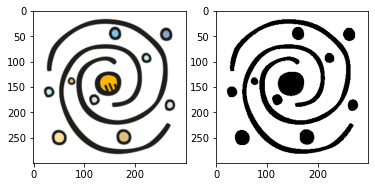

In [909]:
## img2bw TEST 1 

exmple_img = np.array(Image.open("galaxy.png").resize((300, 300)))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(exmple_img, cmap="Greys")

ax[1].imshow(img2bw(exmple_img), cmap="Greys")

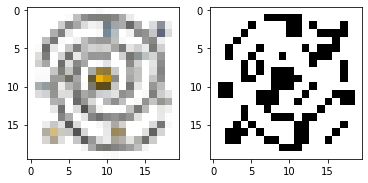

In [910]:
## img2bw TEST 2

exmple_img = np.array(Image.open("galaxy.png").resize((20, 20)))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(exmple_img, cmap="Greys")

ax[1].imshow(img2bw(exmple_img), cmap="Greys")

In [911]:
def set_preset_image(): 

    images = {"img1": [[0, 0, 0, 0, 0],
                   [0, 1, 0, 1, 0],
                   [0, 0, 0, 0, 0], 
                   [1, 0, 0, 0, 1],
                   [0, 1, 1, 1,0]],
            "img2": [[0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 1, 0, 1, 0, 1, 0], 
                   [1, 0, 0, 1, 0, 0, 1],
                   [0, 1, 0, 1, 0, 1, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0]], 
            "img3": [[0, 0, 1, 1, 1, 0, 0],
                   [1, 1, 0, 1, 0, 1, 1],
                   [1, 0, 1, 1, 1, 0, 1],
                   [0, 1, 0, 1, 0, 1, 0],
                   [0, 1, 0, 1, 0, 1, 0], 
                   [0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 1, 0]]
        
    }
    return random.choice(list(images.values()))

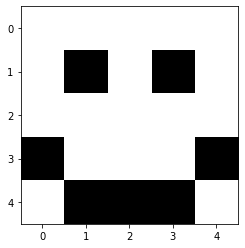

In [957]:
# set_preset_image TEST 1
plt.imshow(set_preset_image(), cmap="Greys")

In [862]:
def load_image(img=None, plot=True, window_sizex=50, window_sizey=50): 
    try: 
        if check_image_loaded(img)[0] == True:
            print("Image Provided, Returning Image....")
            image_array = check_image_loaded(img)[1]
            resized_image = np.array(image_array.resize((window_sizex, window_sizey))) 
            image_array = np.array(img2bw(resized_image))
            
        elif check_image_loaded(img)[0] == False: 
            print("No Image Provided, Returning Preset Image....")
            image_array = check_image_loaded(img)[1] 
        else: 
            pass
    except TypeError:
        pass
    
    if plot is True: 
        try: 
            plt.imshow(image_array, cmap="Greys")
        except UnboundLocalError:
            pass
            
    else: 
        return image_array
            
def check_image_loaded(image=None): 
    if image is None: 
        image_array = set_preset_image()
        return False, image_array
    else:
        try: 
            loaded_image = Image.open(image)
            img = check_image_size(loaded_image)
            return True, img
        
        except FileNotFoundError: 
            print("Image not Valid, Please enter valid format for image (.png, .jpeg, .jpg)")
            pass
        
def check_image_size(image): 
    '''
    checks the size of the image, the user is trying to use, if it is too big, let the user know 
    '''
    if (np.array(image).shape[0] >= 500) and (np.array(image).shape[1] >= 500):
        print("Image is too Big! Please restrict image to 500x500 pixels")
        pass
    elif (np.array(image).shape[0] <= 3) and (np.array(image).shape[1] <= 3):
        print("Image is too Small! Please add an image greater than 3x3 pixels")
        pass
        
    else:
        return image

No Image Provided, Returning Preset Image....


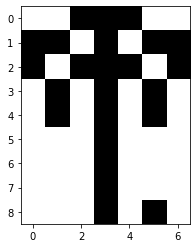

In [958]:
# load_image TEST 1
# what happens if no image is given 

load_image()

In [959]:
# load_image TEST 2

# wrong format for image is given 
load_image("galaxy.g")

Image not Valid, Please enter valid format for image (.png, .jpeg, .jpg)


Image Provided, Returning Image....


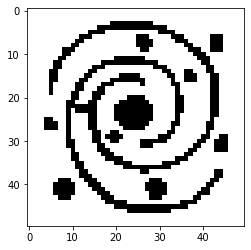

In [865]:
# load_image TEST 3

# correct image path is given 
load_image("galaxy.png")

In [866]:
# load_image TEST 4
# plot=False, no need for image
load_image("galaxy.png", plot=False)

Image Provided, Returning Image....


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Image Provided, Returning Image....


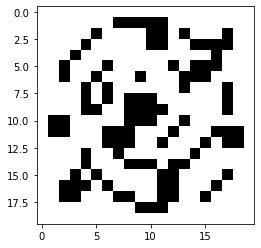

In [915]:
# load_image TEST 5
# window size is stated
load_image("galaxy.png", window_sizex=20,  window_sizey=20)

In [916]:
def plot_grid(length, width): 
    fig, ax = plt.subplots(figsize=(length, width), dpi=100)
    ax.set_xlim(0, length+1)
    ax.set_ylim(-1, width)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.set_xticklabels("")
    ax.set_yticklabels("")

    for i in np.arange(length+1):
        for j in np.arange(width+1):
            ax.annotate(xy= (i+0.2, j-0.6), text=str(i)+", "+str(j))
            
    return fig, ax

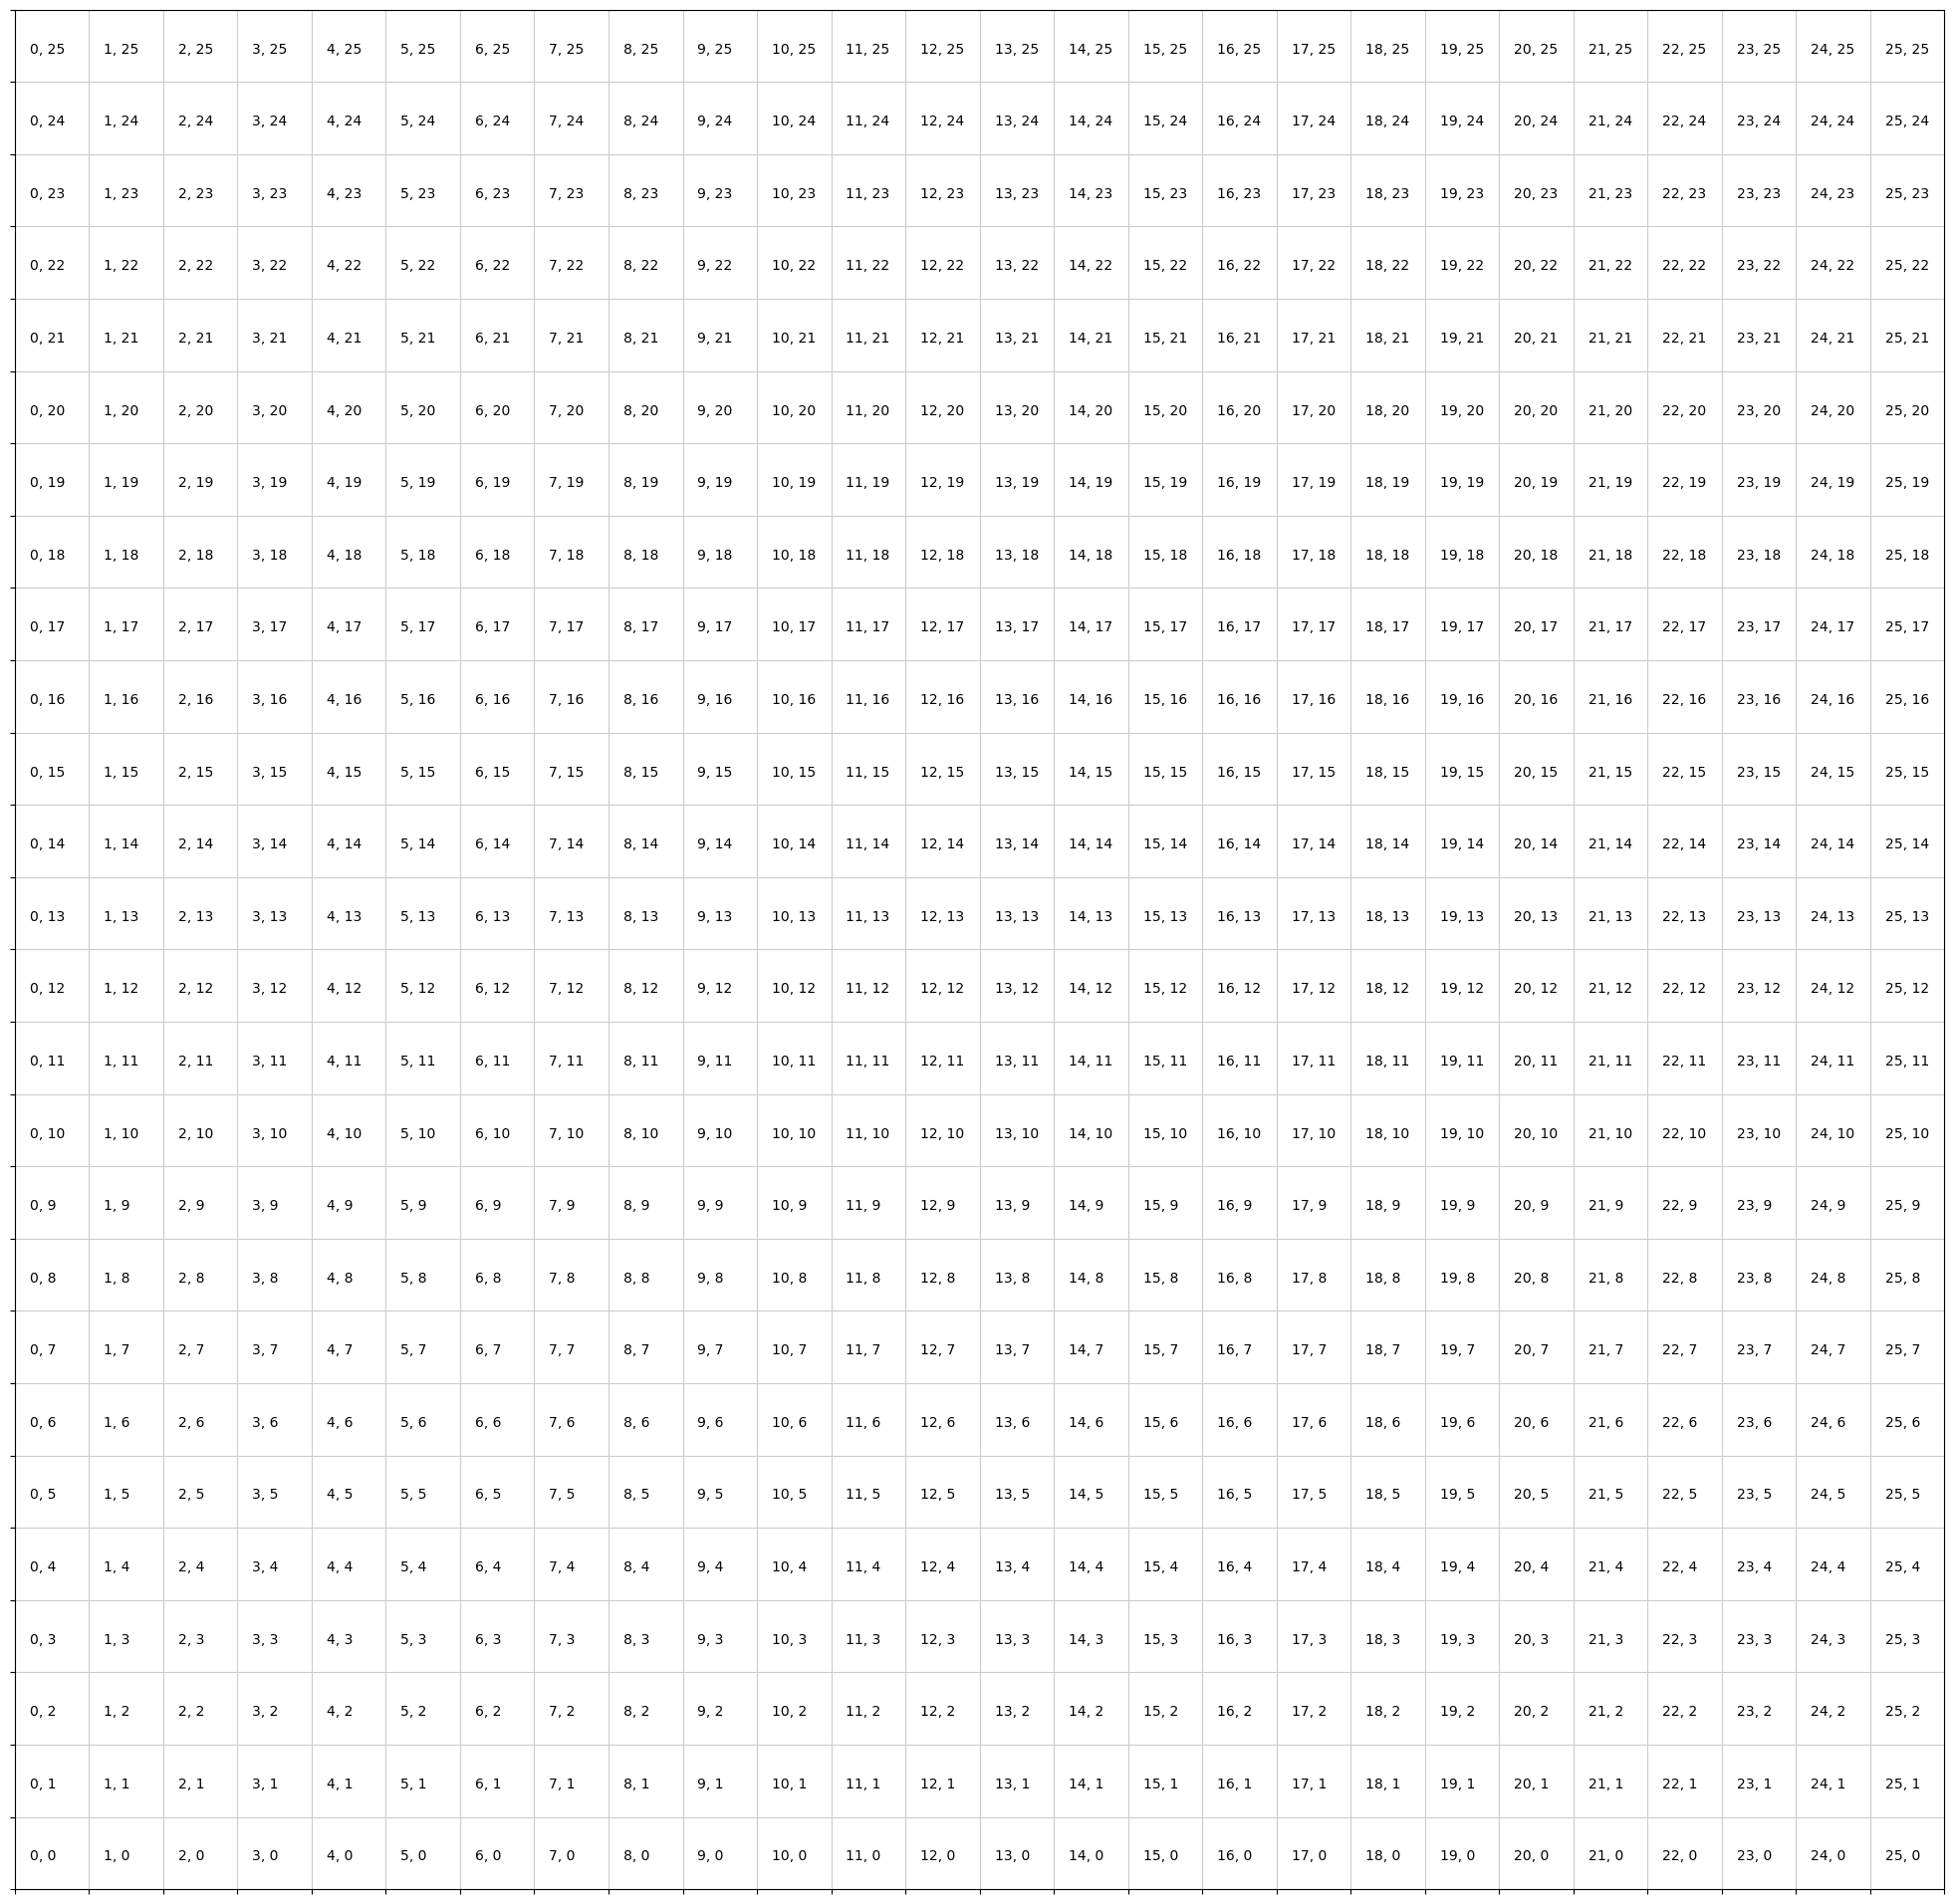

In [917]:
# plot_grid TEST 1

figure, axes = plot_grid(25, 25)

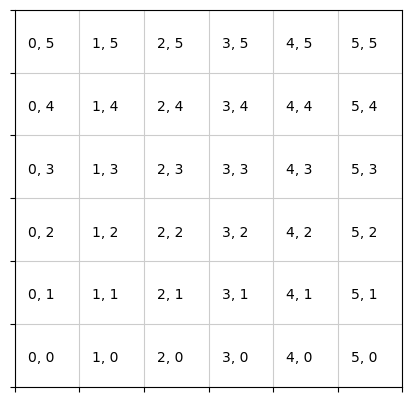

In [919]:
# plot_grid TEST 2

figure, axes = plot_grid(5, 5)

In [947]:
def color_square(example_array, x, y):
    figure, axes = plot_grid(np.shape(example_array)[0], np.shape(example_array)[1]);
    
    if example_array[y][x] == 1:
        axes.plot(x+0.5,y-0.5, marker="s", ms = (10*65/figure.dpi)**2, c="black");
        array[y][x] = 1
        return figure, True
    else: 
        array[y][x] = 0
        axes.plot(x+0.5,y-0.5, marker="s", ms = (10*65/figure.dpi)**2, c="red");
        print("Wrong Tile Colored! \n Please try again")
        return figure, False
    
#plt.imshow(array, origin="lower")

In [948]:
# GAME TEST QUICK (FOR DEBUGGING ONLY)

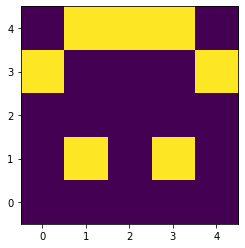

In [949]:
# ANSWERS 
example_array = [[0, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 0, 0, 0], [1, 0, 0, 0, 1],[0, 1, 1, 1,0]]
plt.imshow(example_array, origin="lower")

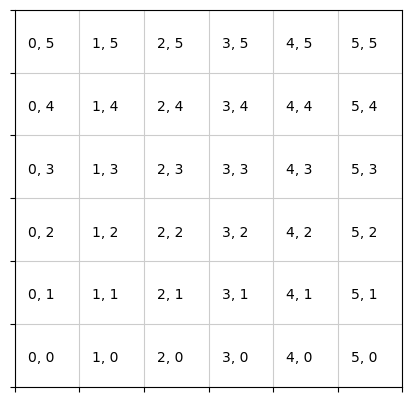

In [950]:
figure, axes = plot_grid(5, 5)

(<Figure size 500x500 with 1 Axes>, True)

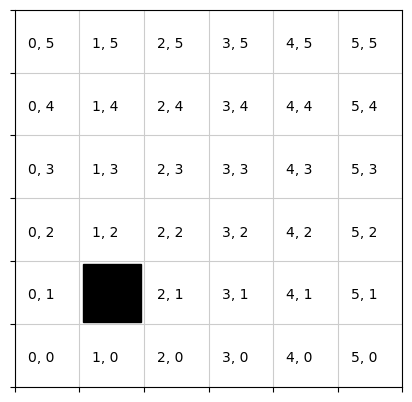

In [951]:
# color_square TEST 1
# Correct Square colored 
color_square(example_array, 1, 1)

Wrong Tile Colored! 
 Please try again


(<Figure size 500x500 with 1 Axes>, False)

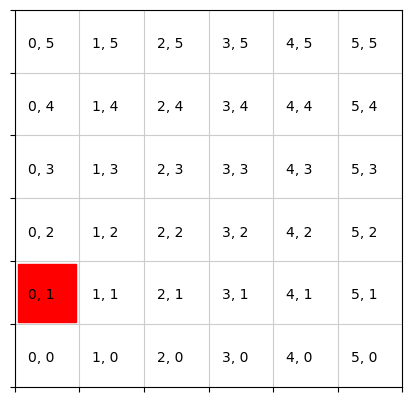

In [952]:
# color_square TEST 2
# Incorrect Square colored 
color_square(example_array, 0, 1)

Wrong Tile


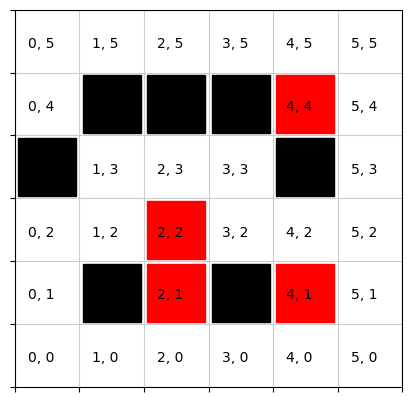

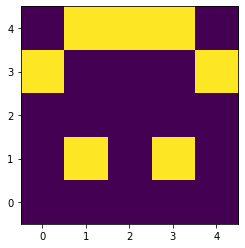

In [647]:
# WHAT THE FINAL RESULTS SHOULD LOOK LIKE
color_square(4, 4)

In [921]:
def get_hint(array): 
    one, = np.where(array == 1)
    np.split(array, np.where(np.diff(array) != 1)[0]+1)
    hints = [len(i) for i in consectutive(one)]
    return hints

In [922]:
# get_hint TEST 1

# goal return [3, 1]
test_array = np.array([0, 1, 1 , 1, 0, 1])

get_hint(test_array)

[3, 1]

In [965]:
row_hint = []
column_hint = []
img = load_image("galaxy.png", plot=False, window_sizex=10, window_sizey=10)

for i in np.arange(len(img)):
    row_hint.append(get_hint(img[i]))
    column_hint.append(get_hint(img.T[i]))
    


Image Provided, Returning Image....


In [968]:
column_hint

[[1], [1, 2], [1, 2], [2], [2], [1, 2, 2], [2], [2], [1, 2], [1, 2]]

In [969]:
row_hint

[[0], [1, 2], [1], [1], [1, 2], [2, 3, 2], [1, 2], [2, 2], [2, 2], [0]]

Image Provided, Returning Image....


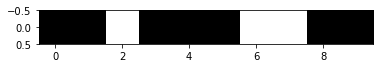

In [938]:
# get_hint TEST 2

test_array = load_image("galaxy.png", plot=False, window_sizex=10, window_sizey=10)[5]

get_hint(test_array)

plt.imshow([test_array, ], cmap="Greys")

In [960]:
get_hint(test_array)

[2, 3, 2]

In [ ]:
def plot_hints()
    '''
    puts hints at the edges of the image 
    '''
    pass

In [953]:
def play():
    pass

In [ ]:
# page to interactive 
# challenge image, mystery image 
# possible 
# .py, import into notebook 
# import game 
# first get everything into .py 
# "class" later 

In [ ]:
rect = [left, bottom, width, height]

In [301]:
rect = .2, .2, .65, .6

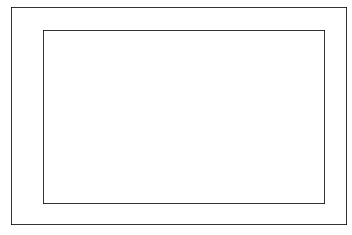

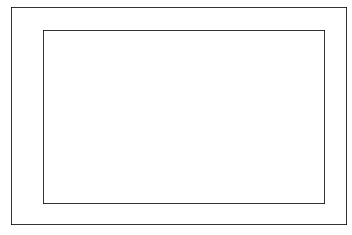

In [325]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.setp(ax1,  xticks=[], yticks=[])

#, xticks=[], yticks=[]
inset1 = fig.add_axes(rect)
plt.setp(inset1,  xticks=[], yticks=[])



Image Provided, Returning Image....


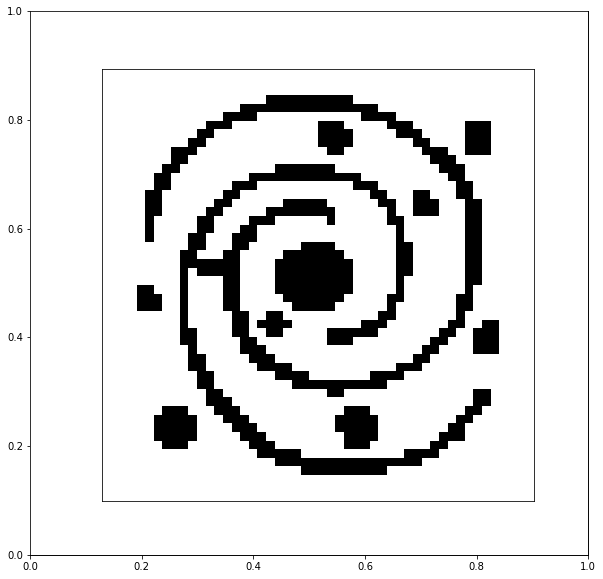

In [346]:
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
plt.setp(ax1,  xticks=[], yticks=[])

#, xticks=[], yticks=[]
inset1 = fig.add_axes(rect)
plt.setp(inset1,  xticks=[], yticks=[])

inset1.imshow(load_image("galaxy.png", plot=False), cmap="Greys")


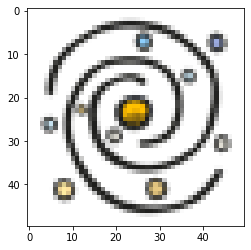

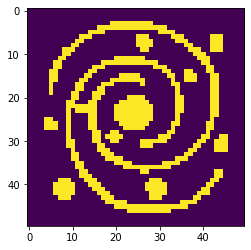

In [186]:
plt.imshow(create_image(np.array(Image.open("galaxy.png").resize((50, 50)))))

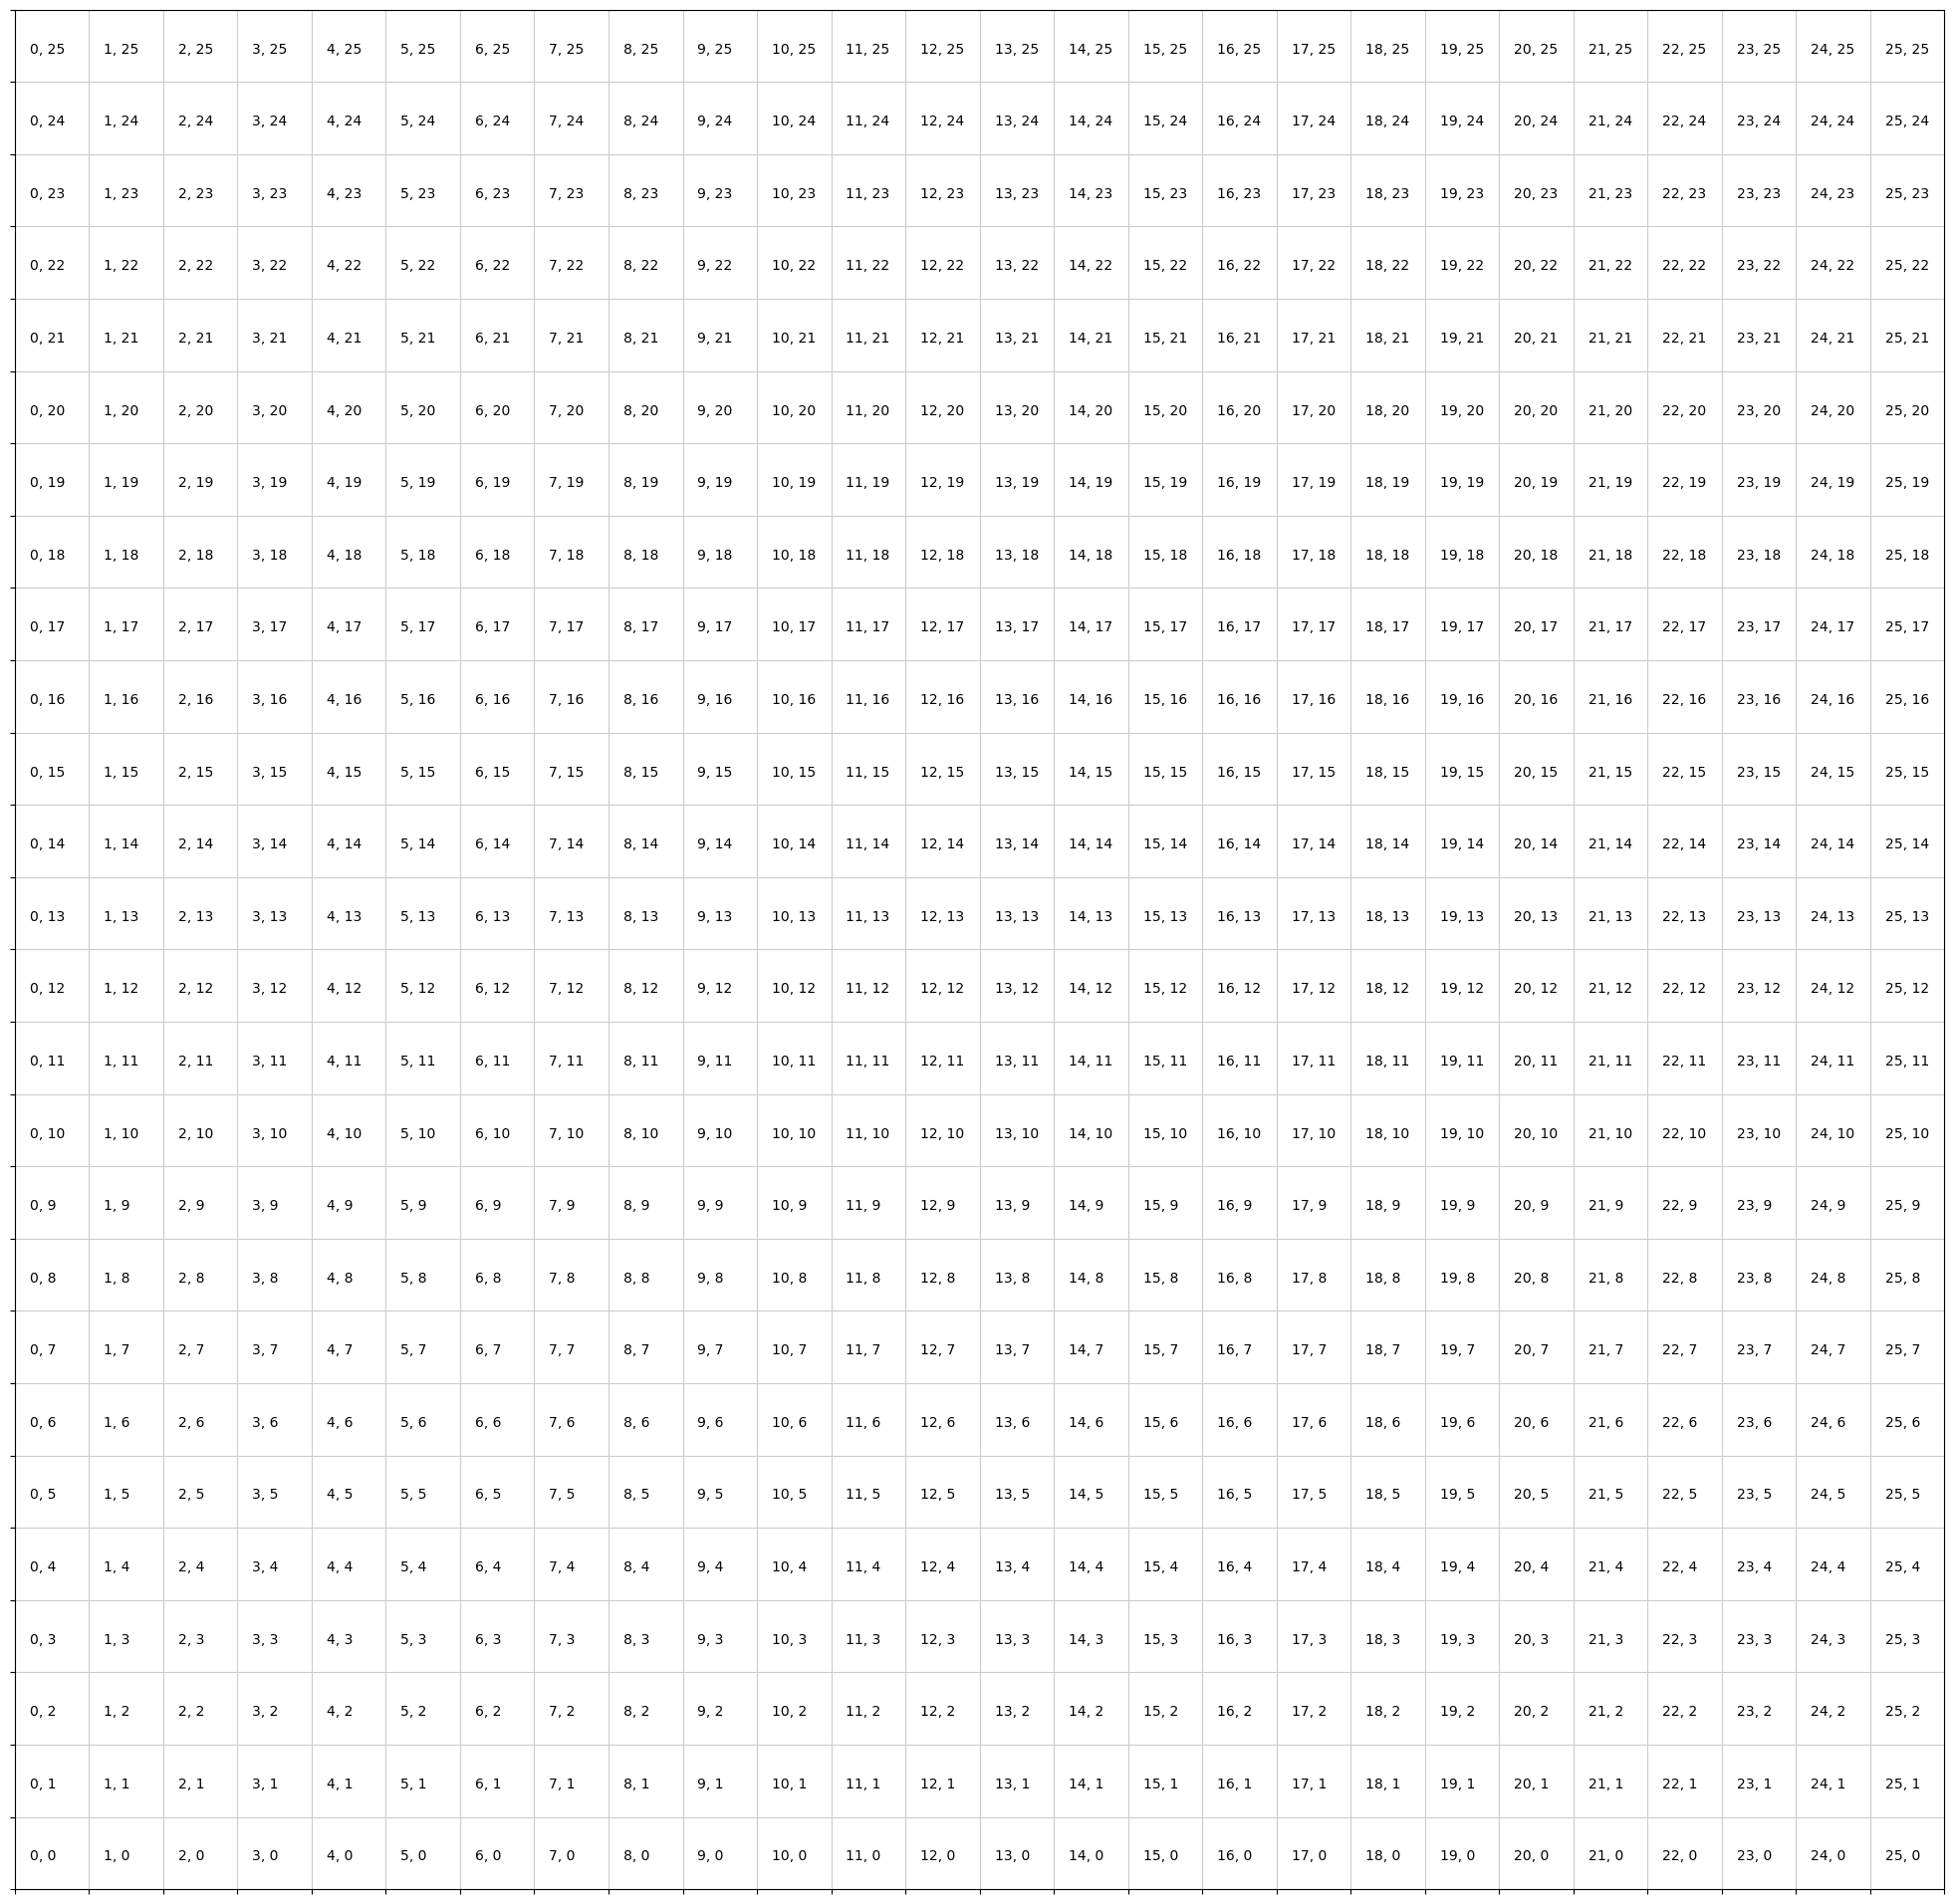

In [583]:
figure, axes = plot_grid(25, 25)

In [737]:
def color_square(example_array, x, y):
    figure, axes = plot_grid(np.shape(example_array)[0], np.shape(example_array)[1])
    
    if example_array[y][x] == 1:
        axes.plot(x+0.5,y-0.5, marker="s", ms = (10*65/figure.dpi)**2, c="black")
        array[y][x] = 1
        return figure, True
    else: 
        array[y][x] = 0
        axes.plot(x+0.5,y-0.5, marker="s", ms = (10*65/figure.dpi)**2, c="red")
        print("Wrong Tile")
        return figure, False
    
#plt.imshow(array, origin="lower")

X coordinates to Color: 1
Y coordinates to Color: 1


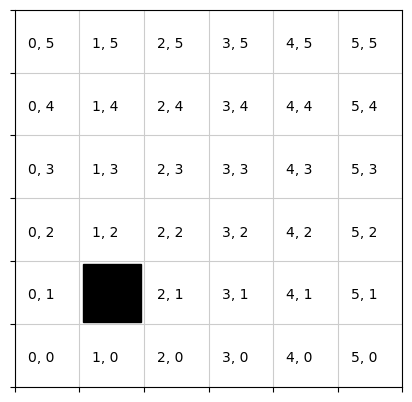

In [695]:
play = True
figure, axes = plot_grid(5, 5)
example_array = [[0, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 0, 0, 0], [1, 0, 0, 0, 1],[0, 1, 1, 1,0]]
while play:
    x_coord = int(input("X coordinates to Color: "))
    y_coord = int(input("Y coordinates to Color: "))
    fig, play = color_square(example_array, x_coord, y_coord)
    fig
    
    
    

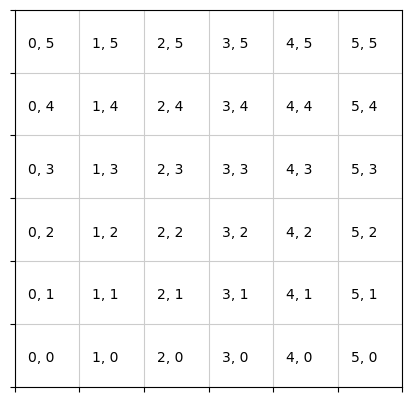

In [727]:
figure, axes = plot_grid(5, 5)

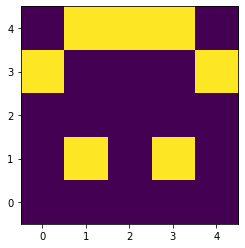

In [745]:
example_array = [[0, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 0, 0, 0], [1, 0, 0, 0, 1],[0, 1, 1, 1,0]]
plt.imshow(example_array, origin="lower")

In [746]:
array = np.zeros((5, 5))

Wrong Tile


(<Figure size 500x500 with 1 Axes>, False)

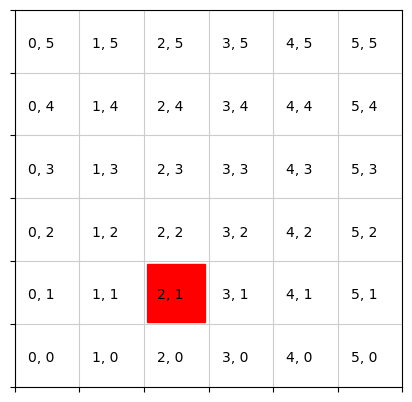

In [749]:
# while loop that allows user to enter in coordinates and then color in squares 
figure = color_square(example_array, 2, 1)
figure

Wrong Tile


(<Figure size 500x500 with 1 Axes>, False)

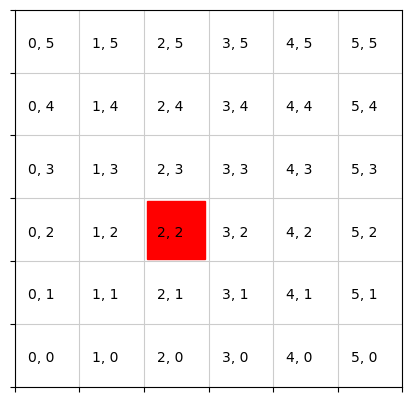

In [751]:
color_square(example_array, 2, 2)

(<Figure size 500x500 with 1 Axes>, True)

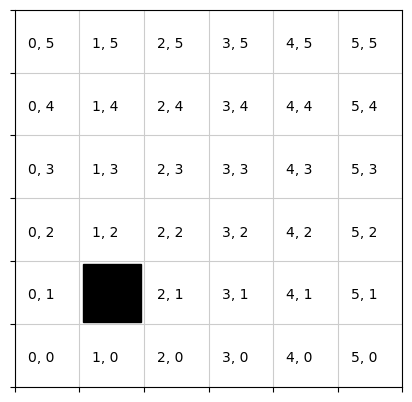

In [743]:
color_square(example_array, 1, 1)

In [616]:
example_array

[[0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1],
 [0, 1, 1, 1, 0]]

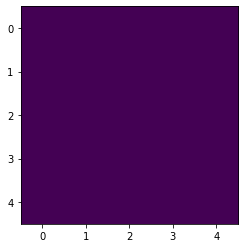

In [598]:
# create array 
array = np.zeros((5, 5))
plt.imshow(array)

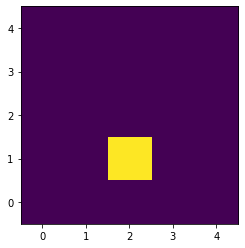

In [599]:
array[1][2] = 1
plt.imshow(array, origin="lower")

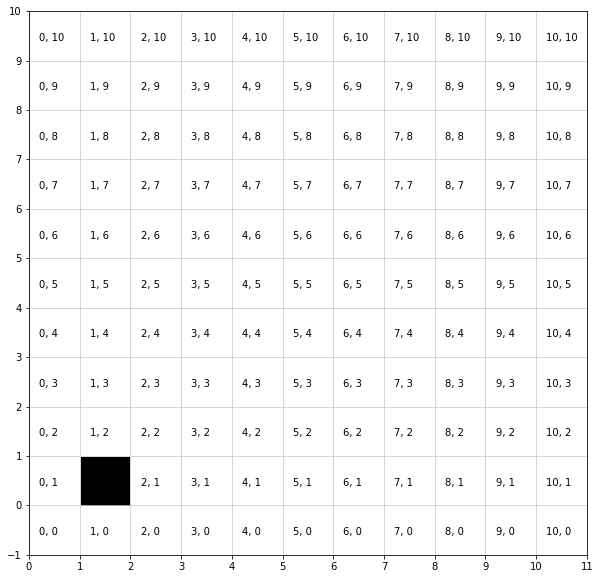

In [437]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 11)
ax.set_ylim(-1, 10)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(which='major', color='#CCCCCC', linestyle='-')

for i in np.arange(11):
    for j in np.arange(11):
        ax.scatter(1+0.5,1-0.5, marker="s", s=2400, c="black")
        #ax.text(i, j, s=str(i)+str(j))
        ax.annotate(xy= (i+0.2, j-0.6), text=str(i)+", "+str(j))

TypeError: 'BboxTransformTo' object is not callable

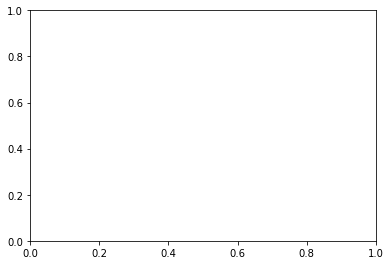

In [903]:
#figuresize
# axes 
# ax.transform 
# figure and axes coordinate s
# ax.text outside of axis 

fig = plt.figure()

ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])

ax.text(-0.1, 0.1, "text", transform=ax.transAxes())

In [904]:
def get_hint(array): 
    one, = np.where(array == 1)
    np.split(array, np.where(np.diff(array) != 1)[0]+1)
    hints = [len(i) for i in consectutive(one)]
    return hints

In [905]:
# goal return [3, 1]
test_array = np.array([0, 1, 1 , 1, 0, 1])

get_hint(test_array)

[3, 1]

In [868]:
np.split(test_array, np.where(np.diff(test_array) != stepsize)[0]+1)

NameError: name 'stepsize' is not defined

In [714]:
index = 0
counts = []

while index <= len(test_array)-1: 
    counter = 0
    if test_array[index] == 1: 
        counter = counter + 1
        index = index + 1
    else:
        counts.append(counter) 
        index = index + 1

In [725]:
index = 0


while index <= len(test_array)-1:
    counter = 0
    #print(test_array[index])
    if test_array[index] == 1: 
        counter = counter + 1
        index = index + 1
        print(counter)
    else:
        index = index + 1
        print(counter)
        

0
1
1
1
0
1


In [723]:
test_array

[0, 1, 1, 1, 0, 1]

1

In [ ]:
def check_image_size(image): 
    if (np.array(image).shape[0] <= 500) or (np.array(image).shape[1] <= 500):
        return image
    else:
        print("Image is too Big! Please restrict image to 500x500 pixels")
        pass

In [ ]:
def check_image_loaded(image): 
    if image is None: 
        print("No Image Provided, Returning Preset Image....")
        image_array = set_preset_image()
        return image_array
    else:
        print("Image Provided, Returning Image....")

In [96]:
# turn rgb image into greyscale image using Matlabs function 
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [165]:
np.shape(imread("galaxy.png"))

(256, 256, 4)

In [177]:
def to_bw(img):

    mask = (img == [1, 1, 1]).all(axis=-1)
    black = np.zeros_like(img)
    white = np.ones_like(img)
    return np.where(mask[:,:,None], white, black)

In [178]:
to_bw(imread("galaxy.png"))

<ipython-input-177-c9ef5a76c495>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mask = (img == [1, 1, 1]).all(axis=-1)


AttributeError: 'bool' object has no attribute 'all'

In [173]:
create_image(imread("galaxy.png"))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

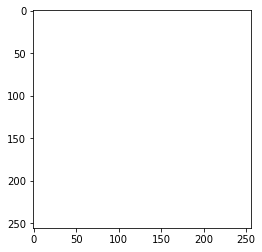

In [175]:
plt.imshow(create_image(imread("galaxy.png")), cmap='Greys')

In [105]:
im = np.array(Image.open("galaxy.png").resize((50, 50))) 
im

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [106]:
create_image(im)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [157]:
im = resize(imread("galaxy.png"), 50, 50)

IndexError: index 256 is out of bounds for axis 0 with size 256

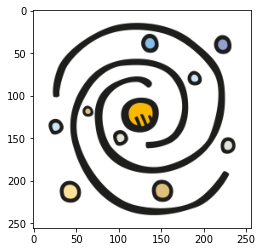

In [158]:
plt.imshow(im, cmap="Greys")


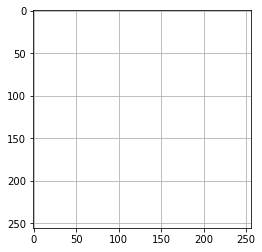

In [152]:
plt.imshow(create_image(im), cmap="Greys")
plt.grid()

In [52]:
def get_hints(array): 
    clues = []
    
    index = 0
    while index < len(array): 
        try: 
            black_index = 
            try: 
            
            except ValueError:
                pass 
                
        
        except ValueError:
            index = len(array)
    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# resize 2D array to desired length x width 
def resize(image, length, width): 
    rows = image.shape[0]
    columns = image.shape[1]
    for row in np.arange(rows): 
        for column in np.arange(columns): 
            return image[int(rows * row / length)][int(columns * column / width)]

In [ ]:
def check_image(image): 
    
    if np.array(image).shape[0] == np.array(image).shape[1]:
        if np.array(image).shape[0] < 500:
            return image
        else:
            print("Image is too Big! Please restrict image to 500x500 pixels")
            pass
    else:
        print("Image is not Symmetrical, please insert an image with size NxN")
        pass
    

In [ ]:
# loads in the image and shows the user what the image is 
# if no image is provided then a preset image is set and shown 

def load_image(img=None, plot=True, window_size=50): 
    if img is None: 
        print("No Image Provided, Returning Preset Image....")
        example_array = [[0, 0, 0, 0, 0],[0, 1, 0, 1, 0],[0, 0, 0, 0, 0], [1, 0, 0, 0, 1],[0, 1, 1, 1,0]]
        image_array = example_array
    else:
        print("Image Provided, Returning Image....")
        
        try: 
            loaded_image = Image.open(img)
            
        except FileNotFoundError: 
            print("Image not Valid, Please enter valid format for image (.png, .jpeg, .jpg)")
            pass
        img = check_image(loaded_image)
                    
        im = np.array(Image.open(img).resize((window_size, window_size))) 
        image_array = np.array(img2bw(im))
    
    
    if plot is True: 
        try: 
            plt.imshow(image_array, cmap="Greys")
            
        except UnboundLocalError:
            pass
            
    else: 
        return image_array
            